# Kodiak Station 7 - Data Deepdive

We originally thought that we observed 3 possible predictors for Mag 5+ earthquakes in the lat/long window around Kodiak Island based on visual inspection of Station 7 data:

Magnetic Field X
Magnetic Field Y
Magnetic Field Z

Our Station 7 dataset covers 12-03-2014 to 2016-7-31. However, the Station did not start taking measurement on Magnetic Field until around August 2015, so we only have 1 year of valid magnetic field data.

During this time period, there are a total of 4 predictor events. These events are followed by 6 earthquakes of magnitude 5.2 to 7.1:


|timestamp    |datatime          | long      | lat	    | magnitude| depth  |
|-------------|------------------|-----------|----------|----------|--------|
|1454194019   |1/30/2016 22:46   |-152.575   |59.3577   |5.1       |1.44    |
|1453631430   |1/24/2016 10:30   |-152.548   |59.6585   |7.1       |127.84  |
|1450388018   |12/17/2015 21:33  |-151.851   |61.2652   |5.4       |26.21   |
|1449706255   |12/10/2015 0:10   |-154.714   |58.1937   |5.5       |3.53    |
|1449706208   |12/10/2015 0:10   |-151.462   |61.1838   |5.5       |8.2     |
|1447812083   |11/18/2015 2:01   |-154.835   |58.2432	|5.2       |3.51    |


![Earthquakes Predicted](alaska_data/kodiak_eq.png)

## Import the Data

The code below import station 7 predictor data and earthquake data into numpy array X and Y.

From now on, we can perform our analysis using X and Y.

In [1]:
# As usual, a bit of setup

import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from data_util.data_analyze import *
import sys

filename = 'earthquake_data/mag5_eq_Kodiak_20141203_20160731_wider2.csv'

num = num_datapoints(filename)
Y = np.zeros((5,num))
print Y.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    print fieldnames
    
    for row in reader:
        Y[0,i] = row[fieldnames[0]]
        Y[1,i] = row[fieldnames[2]]
        Y[2,i] = row[fieldnames[3]]
        Y[3,i] = row[fieldnames[4]]
        Y[4,i] = row[fieldnames[5]]
        
        i += 1
               
f.close()

import numpy as np
from data_util.data_analyze import *
import sys

filename = 'alaska_data/alaska7.csv'

num = num_datapoints(filename)
X = np.zeros((9,num))
print X.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    print fieldnames
    
    for row in reader:
        X[0,i] = row[fieldnames[0]]
        X[1,i] = clean_data(row, fieldnames[1])
        X[2,i] = clean_data(row, fieldnames[2])
        X[3,i] = clean_data(row, fieldnames[3])
        X[4,i] = clean_data(row, fieldnames[4])
        X[5,i] = clean_data(row, fieldnames[5])
        X[6,i] = clean_data(row, fieldnames[6])
        X[7,i] = clean_data(row, fieldnames[7]) 
        X[8,i] = np.sqrt(X[1,i]**2 + X[2,i]**2 + X[3,i]**2)   # magnitude of the magnetic field vector
        
        i += 1
               
f.close()

# Fill in missing data using linear interpolation
X[1] = fill_missing_data(X[1])
X[2] = fill_missing_data(X[2])
X[3] = fill_missing_data(X[3])

(5L, 8L)
['timestamp', 'datetime', 'long', 'lat', 'magnitude', 'depth']
(9L, 569553L)
['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']


## Magnetic Field Data

Some facts about Magnetic Field data:
1. Station 7 started taking measurements on its vector magnetometer on ** Aug 1, 2015 **.  
2. Average value of Mag Field (in nTesla): 
  * X component is 17029.5  
  * Y component is 5226.9
  * Z component is 52162.0  
3. The X and Y components of the magnetometer readout indicates that the station is aligned at 17 degree to the Magnetic North, which in Old Harbor, Alaska is 14.7 degree East of the True North (pointing to the North Pole).

![Mag_X Predictor](alaska_data/station7_alignment.png)

![Mag_X Predictor](alaska_data/station7_mag_x_predictor.png)

In [4]:
from datetime import datetime
from data_util.data_analyze import *

_, N = X.shape

for i in range(N):
    if X[1,i] > 15000:
        break

print X[0,i] 
print "Station 7 started magnetic field measuring on %s" % datetime.utcfromtimestamp(X[0,i])

# Calculate the average value of Mag Field - X
print "Average for Mag Field - X in nTesla: %.1f" % (np.sum(X[1,i:])/np.count_nonzero(X[1,i:]))

# Calculate the average value of Mag Field - Y
print "Average for Mag Field - X in nTesla: %.1f" % (np.sum(X[2,i:])/np.count_nonzero(X[1,i:]))

# Calculate the average value of Mag Field - Z
print "Average for Mag Field - X in nTesla: %.1f" % (np.sum(X[3,i:])/np.count_nonzero(X[1,i:]))


1438387200.0
Station 7 started magnetic field measuring on 2015-08-01 00:00:00
Average for Mag Field - X in nTesla: 17029.5
Average for Mag Field - X in nTesla: 5226.9
Average for Mag Field - X in nTesla: 52162.0


## Filling in Missing Data

The code below is used to fill in the missing data (set to zero). Based on this test code, we develop a routine fill_missing_data() in data_analyze.py, which is used to obtain cleaner data from alaska7.cvs.


In [70]:
from scipy.interpolate import interp1d

x = np.array([10., 20., 0, 40., 50., 0, 30.])

not_zero = np.nonzero(x)
print not_zero

indices = np.arange(len(x))

interp = interp1d(indices[not_zero], x[not_zero])
y=interp(indices)
print y

(array([0, 1, 3, 4, 6], dtype=int64),)
[ 10.  20.  30.  40.  50.  40.  30.]


-0.256814
19121.4


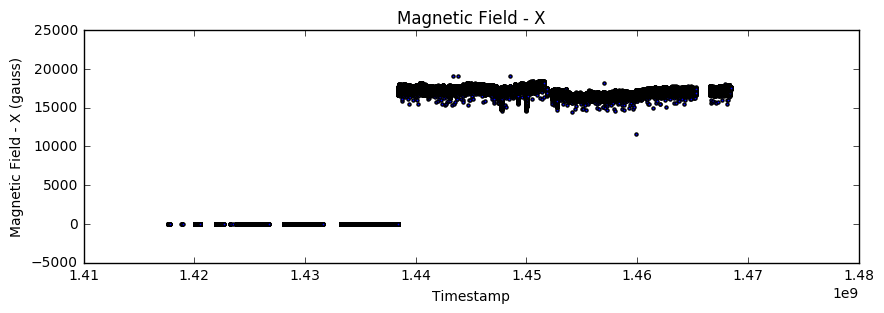

In [5]:
print np.min(X[1])
print np.max(X[1])
station = "station7"

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (gauss)', title='Magnetic Field - X')
figure.savefig(station+'_mag_x_filled.png', bbox_inches='tight')

## Magnetic Field - X

We need to quantify the inherent noise in the Mag Field - X dataset. We pick a few random days where there is no predictor event and visualize and quantify the measurement fluctuation:

(1) Visually the noise appears to have an amplitude of 900 - 1500nT and a daily frequency of 4-6  
(2) Magnetic Field - X can be between 16000nT to 18000nT


1438473600
16489.4
17926.2
1436.8


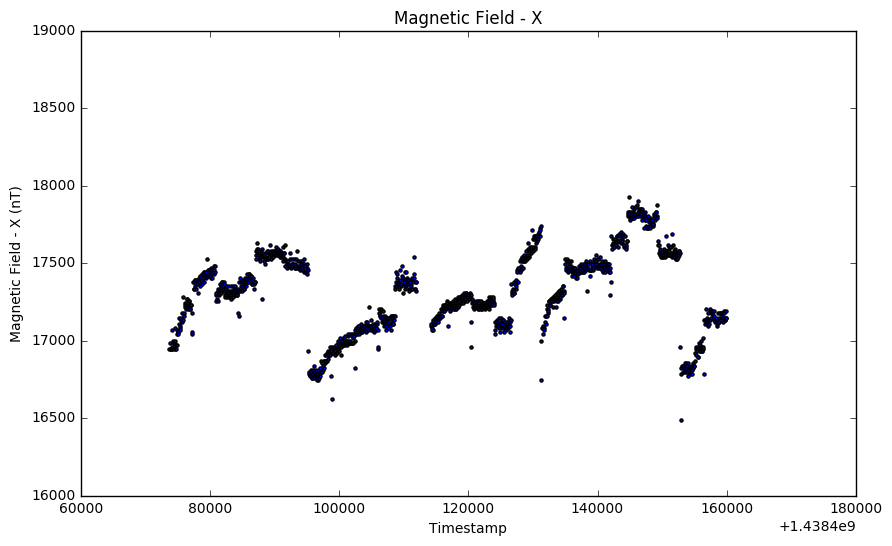

1438819200
16623.8
17953.2
1329.4


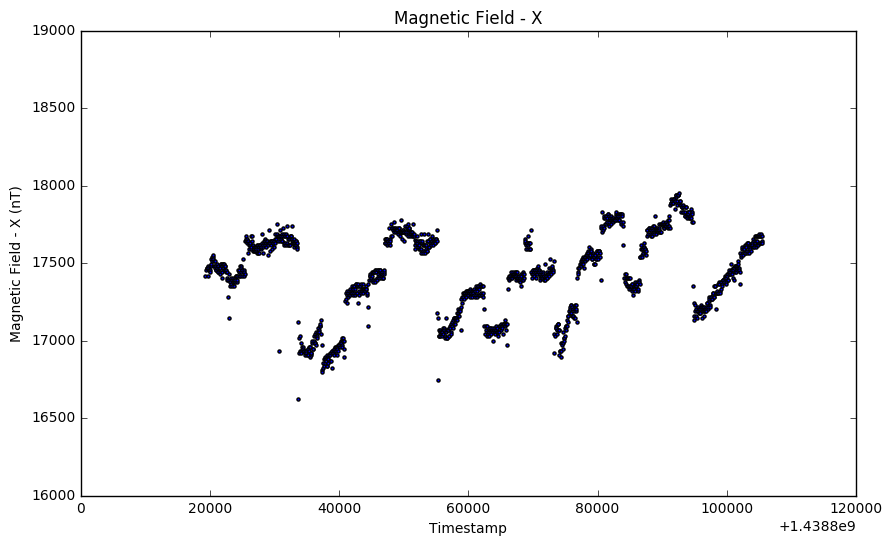

1444089600
16758.0
17751.8
993.8


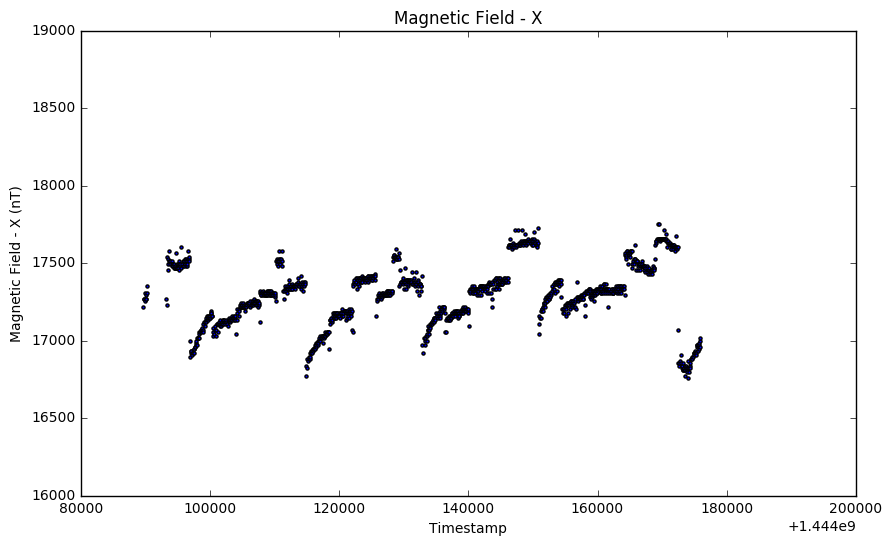

In [14]:
import calendar
import datetime
from scipy.interpolate import interp1d

station = 'station7'

dt = datetime.datetime(2015, 8, 2, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[1][idx])
print np.max(X[1][idx])
print np.max(X[1][idx])-np.min(X[1][idx])

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[16000,19000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-8-2.png', bbox_inches='tight')

dt = datetime.datetime(2015, 8, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[1][idx])
print np.max(X[1][idx])
print np.max(X[1][idx])-np.min(X[1][idx])

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[16000,19000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-8-6.png', bbox_inches='tight')

dt = datetime.datetime(2015, 10, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[1][idx])
print np.max(X[1][idx])
print np.max(X[1][idx])-np.min(X[1][idx])

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[16000,19000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-10-6.png', bbox_inches='tight')

## Magnetic Field - Y

Next we quantify the inherent noise in the Mag Field - Y dataset. We pick a few random days where there is no predictor event and visualize and quantify the measurement fluctuation:

(1) Visually the noise appears to have an amplitude of 1800 - 2700nT and a daily frequency of 4-6.  
(2) Magnetic Field - Y can be between 3000nT to 6000nT  
(3) Overall the data is a lot noisier (SNR is high)  

1438473600
3679.0
5518.6
1839.6


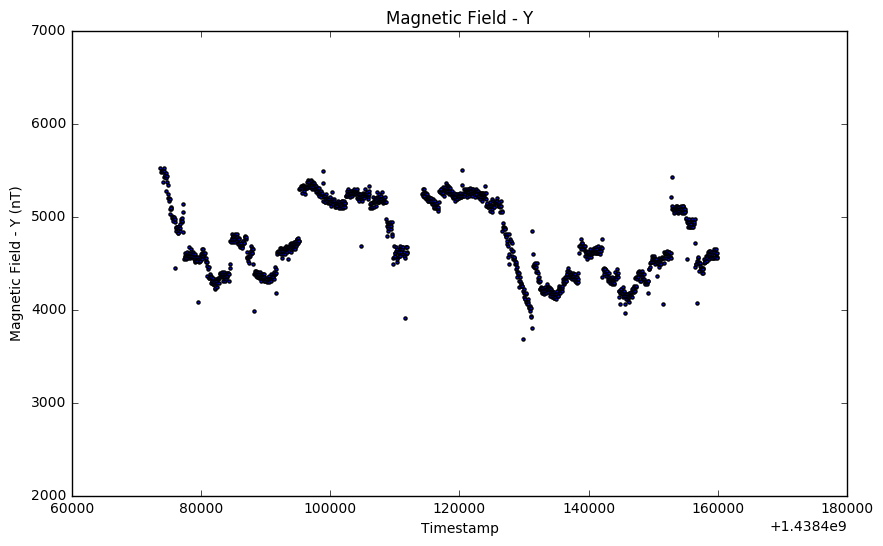

1438819200
3209.0
5881.2
2672.2


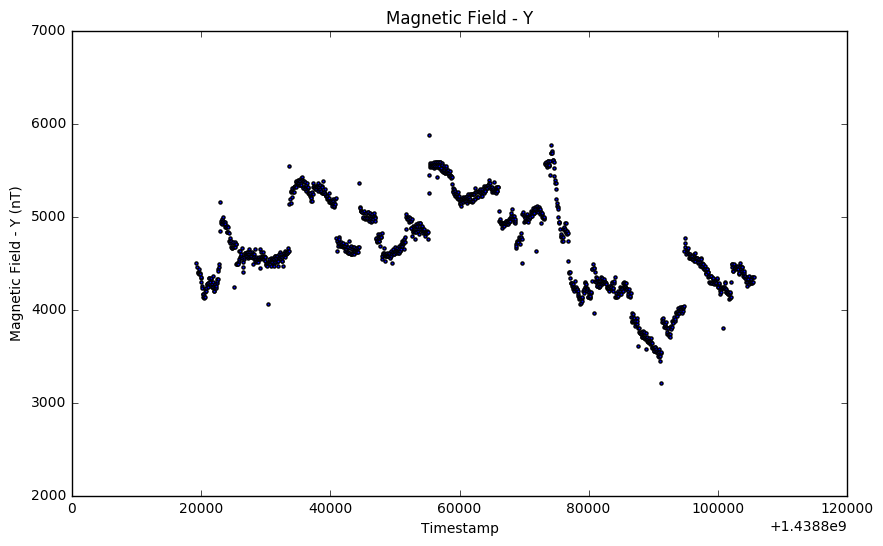

1444089600
4028.2
5921.4
1893.2


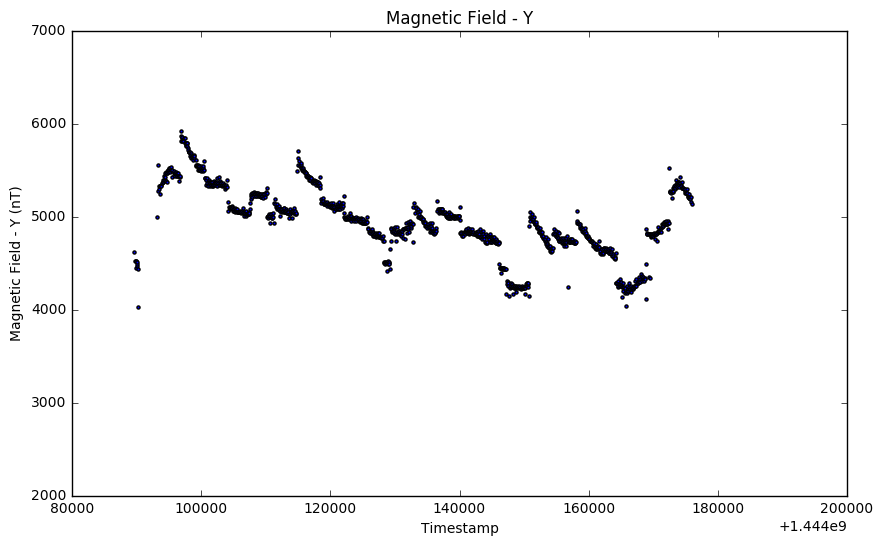

In [16]:
import calendar
import datetime
from scipy.interpolate import interp1d

station = 'station7'

dt = datetime.datetime(2015, 8, 2, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[2][idx])
print np.max(X[2][idx])
print np.max(X[2][idx])-np.min(X[2][idx])

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[2000,7000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-8-2.png', bbox_inches='tight')

dt = datetime.datetime(2015, 8, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[2][idx])
print np.max(X[2][idx])
print np.max(X[2][idx])-np.min(X[2][idx])

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[2000,7000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-8-6.png', bbox_inches='tight')

dt = datetime.datetime(2015, 10, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[2][idx])
print np.max(X[2][idx])
print np.max(X[2][idx])-np.min(X[2][idx])

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[2000,7000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-10-6.png', bbox_inches='tight')

## Magnetic Field - Z

Next we quantify the inherent noise in the Mag Field - Z dataset. We pick a few random days where there is no predictor event and visualize and quantify the measurement fluctuation:

(1) Visually the noise appears to have an amplitude of 1900 - 5100nT and a daily frequency of >2.  
(2) Magnetic Field - Y can be between 50000nT to 56000nT    

1438473600
50408.2
52973.0
2564.8


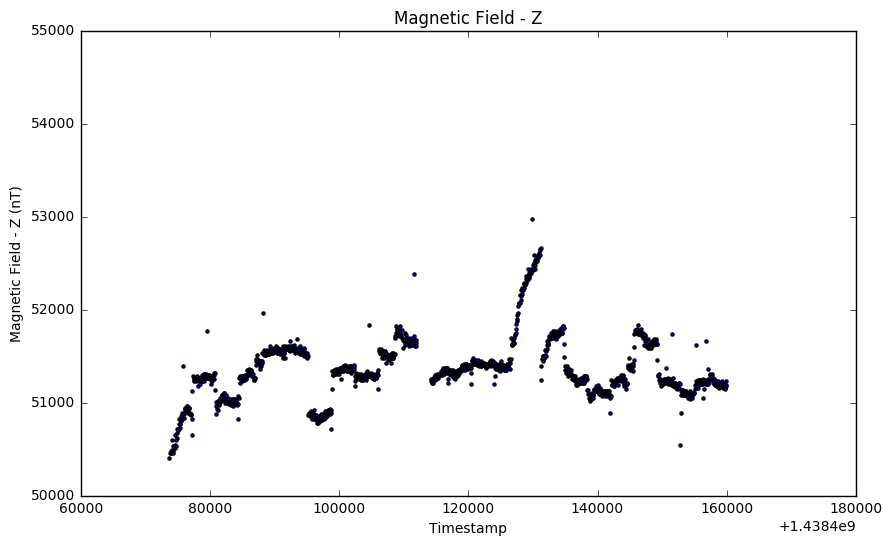

1438819200
50273.8
52194.0
1920.2


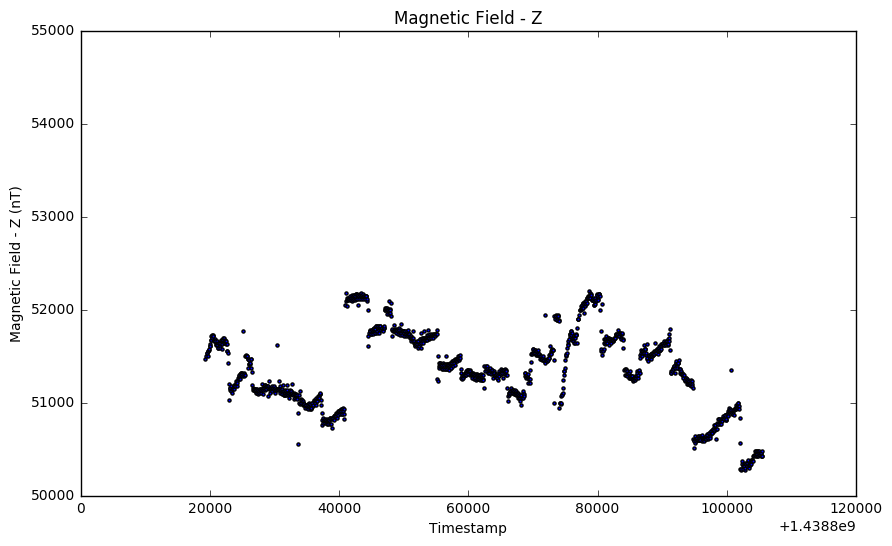

1444089600
50542.4
55645.2
5102.8


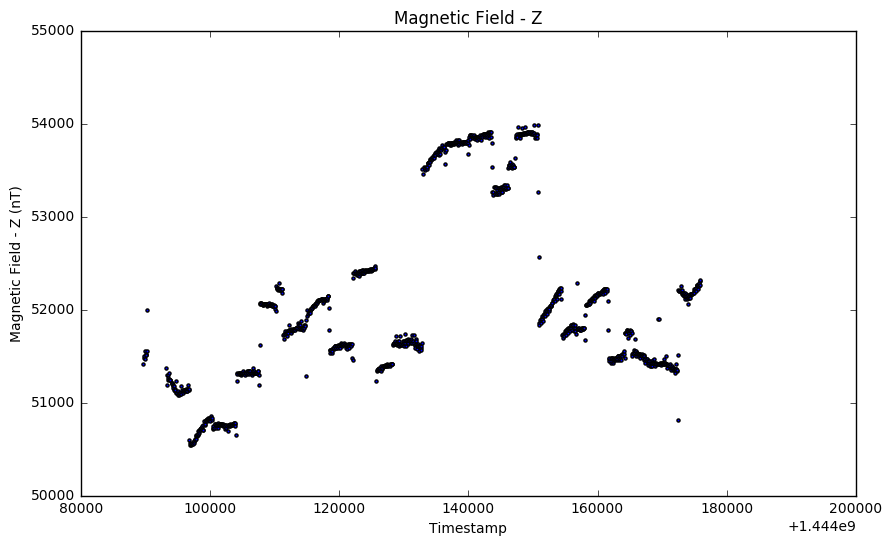

In [9]:
import calendar
import datetime
from scipy.interpolate import interp1d

station = 'station7'

dt = datetime.datetime(2015, 8, 2, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[3][idx])
print np.max(X[3][idx])
print np.max(X[3][idx])-np.min(X[3][idx])

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', ylimit=[50000,55000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-8-2.png', bbox_inches='tight')

dt = datetime.datetime(2015, 8, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[3][idx])
print np.max(X[3][idx])
print np.max(X[3][idx])-np.min(X[3][idx])

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', ylimit=[50000,55000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-8-6.png', bbox_inches='tight')

dt = datetime.datetime(2015, 10, 6, 0, 0, 0)
timestamp = calendar.timegm(dt.timetuple())
print timestamp

idx = (X[0] > timestamp) & (X[0] < timestamp+24*60*60)  # generate Boolean index
print np.min(X[3][idx])
print np.max(X[3][idx])
print np.max(X[3][idx])-np.min(X[3][idx])

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
timewindow = (timestamp,0,1)   # plot over a 24 hour period
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', ylimit=[50000,55000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-10-6.png', bbox_inches='tight')

## The Predictor Events



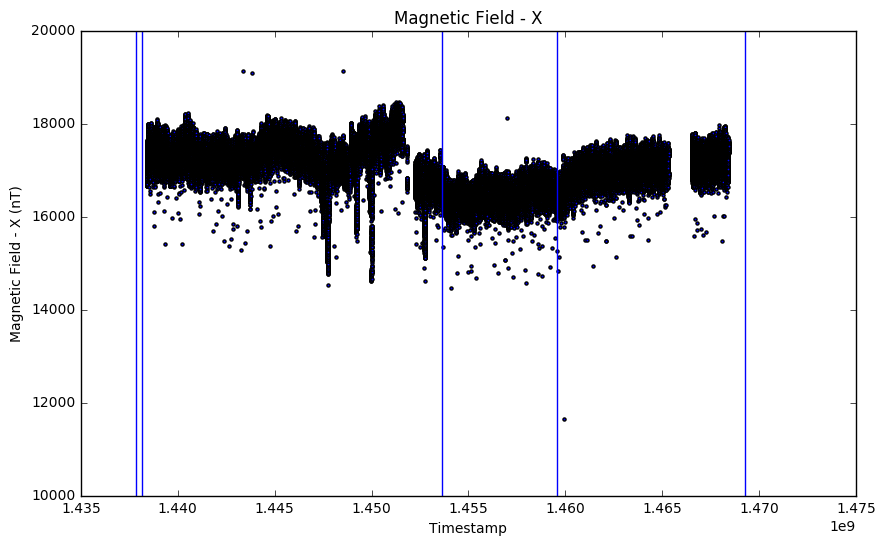

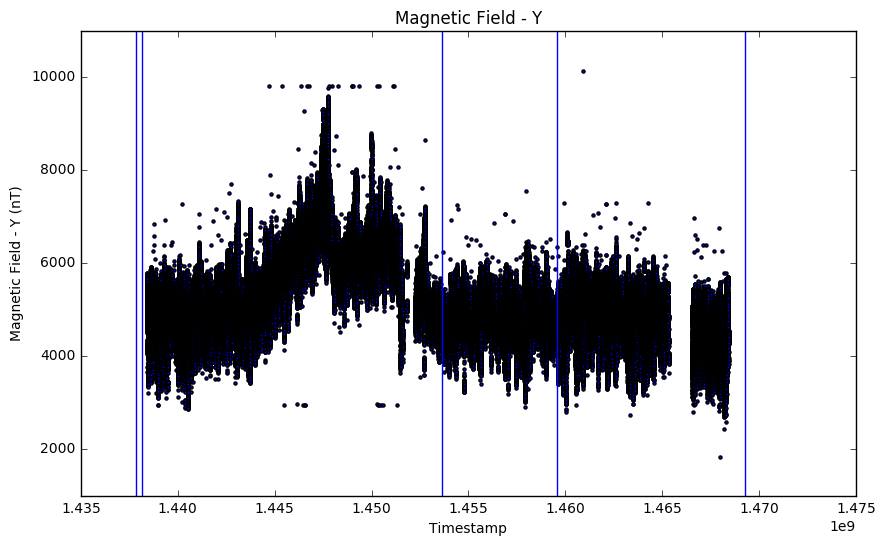

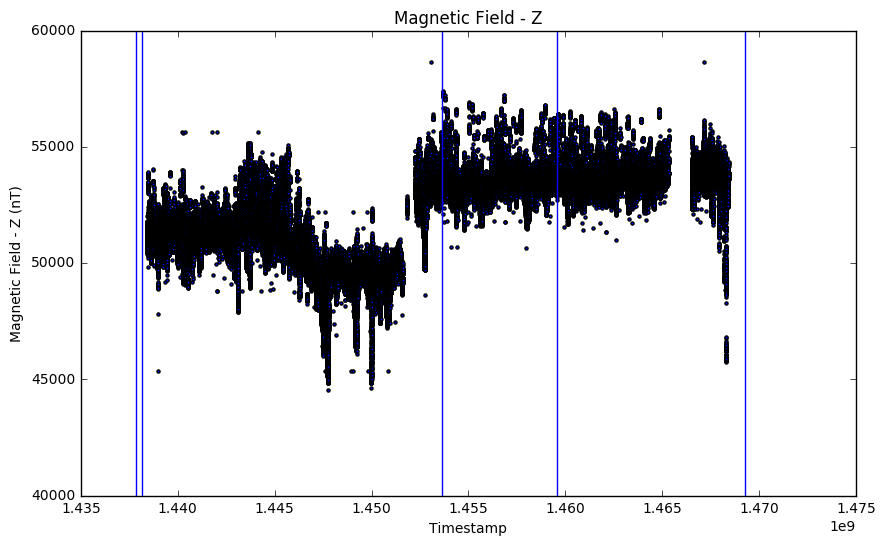

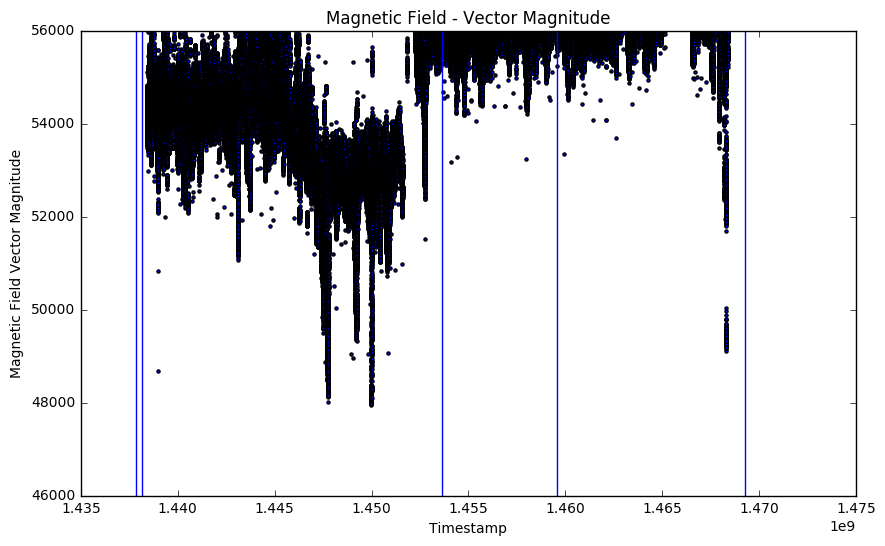

In [7]:
from data_util.data_analyze import *

d,N = X.shape

station = 'station7'
timewindow = (1454194019,200,180)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)',ylimit=[10000,20000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-11-18_deepdive.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[1000,11000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-11-18_deepdive.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)',  ylimit=[40000,60000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-11-18_deepdive.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', ylimit=[46000,56000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-11-18_deepdive.png', bbox_inches='tight')

0
5.0
1
6.0
2
7.0
3
8.0
4
9.0
5
10.0
6
11.0
7
10.0
8
9.0
9
8.0
[  0.    5.5   6.5   7.5   8.5   9.5  10.5  10.5   9.5   8.5   7.5]
(569553L,)
569553


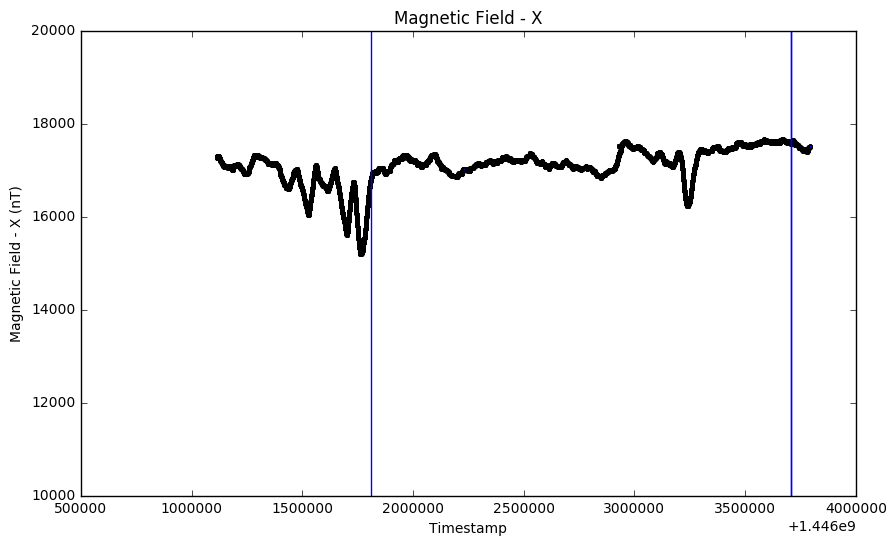

In [58]:


n = 1
A = np.array([5.,6.,7.,8.,9.,10.,11.,10.,9.,8.,7.])
B = np.zeros_like(A)
for i in range(len(A)-n):
    print i
    print np.sum(A[i:i+n])
    B[i+n] = np.sum(A[i:i+n+1])/(n+1)
print B

Z = np.zeros_like(X[1])
print Z.shape
print len(X[1])

n = 500
Z = np.zeros_like(X[1])
for i in range(len(X[1])-n):
    Z[i+n] = np.sum(X[1][i:i+n+1])/(n+1)

timewindow = (1449706208,30,1)
# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], Z, Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)',ylimit=[10000,20000],
                       eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)